<a href="https://colab.research.google.com/github/manendranathshukla/IoT_Project_With_Data_Analytics/blob/master/Copy_of_PracticePrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iot Project Machine Learning Implementation


In [0]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("NEW(2).csv")
mydata=pd.DataFrame(data)


In [0]:
mydata.head()

,Temperature,Salinity,DO%,PH,Turbidity
0,13.16,33.06,82.90,7.88,3.3
1,13.18,33.13,83.50,7.89,4.4
2,13.13,33.25,84.20,7.90,4.6
3,13.10,33.34,84.81,7.91,5.8
4,13.05,33.45,85.60,7.92,3.5


In [0]:
mydata = mydata.apply (pd.to_numeric, errors='coerce')
mydata = mydata.dropna()


In [0]:
mydata.shape

(39988, 5)

In [0]:
np.any(np.isnan(mydata))


False

In [0]:
np.all(np.isfinite(mydata))

True

In [0]:
Y=mydata['PH']
x=mydata.drop('PH',axis=1)


In [0]:
x=x.drop('Salinity',axis=1)

In [0]:
x

,Temperature,DO%,Turbidity
0,13.16,82.90,3.3
1,13.18,83.50,4.4
2,13.13,84.20,4.6
3,13.10,84.81,5.8
4,13.05,85.60,3.5
...,...,...,...
39993,16.30,92.20,15.3
39994,16.28,92.20,15.6
39995,16.30,92.20,17.6
39996,16.34,92.40,19.2


In [0]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,39988.0,23.628710,3.799761,5.17,21.84,24.42,26.32,30.98
Salinity,39988.0,23.665266,3.549520,12.37,21.22,22.64,27.03,34.03
DO%,39988.0,102.596056,26.736588,17.62,87.90,98.20,112.40,308.20
PH,39988.0,7.932014,0.203872,7.31,7.80,7.93,8.06,8.83
Turbidity,39988.0,4.371219,5.388780,0.10,2.40,3.17,4.25,149.20


In [0]:
Y.head()

0    7.88
1    7.89
2    7.90
3    7.91
4    7.92
Name: PH, dtype: float64

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=5)

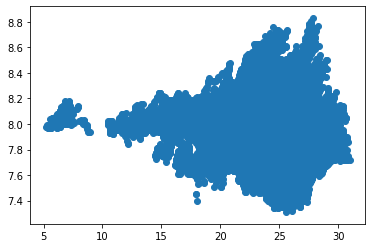

In [0]:
phdata=mydata['PH']
temp=mydata['Temperature']
#plt.plot(temp, phdata, 'b-', label='ph Value')
#plt.plot(years, temp, 'g-', label='Temperature Value')
plt.scatter(temp, phdata)



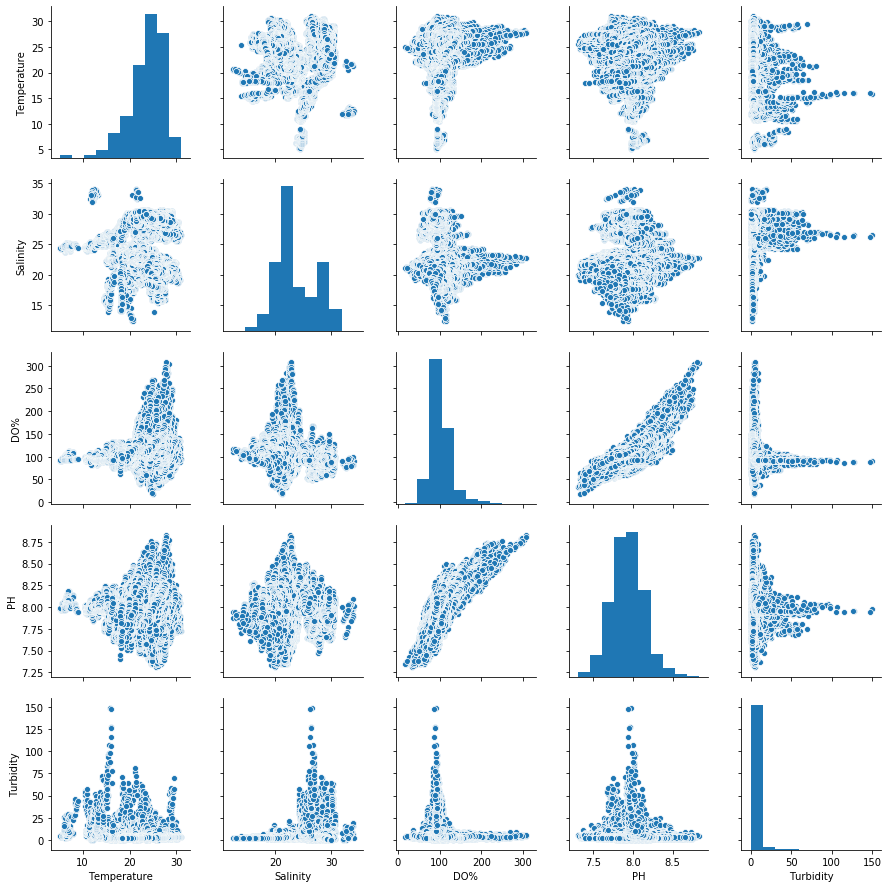

In [0]:
import seaborn as sns
sns.pairplot(mydata)

In [0]:


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(29991, 3)
(9997, 3)
(29991,)
(9997,)


In [0]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
dtr=DecisionTreeRegressor(random_state=1)
svmmodel=svm.SVR()
clf = GradientBoostingRegressor(**params)

lm=LinearRegression()
rdf=RandomForestRegressor()
mlp = MLPRegressor(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=500)



In [0]:
lm.fit(x_train,y_train)
mlp.fit(x_train,y_train)
clf.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdf.fit(x_train,y_train)
svmmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn.metrics import r2_score,mean_absolute_error
print("Linear Regression Model Accuracy : %f"%(r2_score(y_test,lm.predict(x_test))))
print("Multilayer Perceptron Regression Model Accuracy : %f"%(r2_score(y_test,mlp.predict(x_test))))
print("Support Vector Machine Regression Model Accuracy : %f"%(r2_score(y_test,svmmodel.predict(x_test))))
print("Decision Tree Regression Model Accuracy : %f)"%(r2_score(y_test,dtr.predict(x_test))))
print("Gredient Boosting Regression Model Accuracy : %f)"%(r2_score(y_test,clf.predict(x_test))))
print("Random Forest Regression Model Accuracy : %f)"%(r2_score(y_test,rdf.predict(x_test))))


Linear Regression Model Accuracy : 0.747980
Multilayer Perceptron Regression Model Accuracy : 0.702550
Support Vector Machine Regression Model Accuracy : 0.813688
Decision Tree Regression Model Accuracy : 0.781713)
Gredient Boosting Regression Model Accuracy : 0.832191)
Random Forest Regression Model Accuracy : 0.877211)


In [0]:

print("All Model's  Mean Squared Error ")
print("Linear Regression Model MSE Error : %f"%(mean_squared_error(y_test,lm.predict(x_test))))
print("Multilayer Perceptron Regression Model MSE Error : %f"%(mean_squared_error(y_test,mlp.predict(x_test))))
print("Support Vector Machine Regression Model MSE Error : %f"%(mean_squared_error(y_test,svmmodel.predict(x_test))))
print("Decision Tree Regression Model MSE Error: %f)"%(mean_squared_error(y_test,dtr.predict(x_test))))
print("Gredient Boosting Regression Model MSE Error : %f)"%(mean_squared_error(y_test,clf.predict(x_test))))

print("Random forest Regression Model MSE Error : %f)"%(mean_squared_error(y_test,rdf.predict(x_test))))
#print("Random forest Regression Model MSE Error : %f)"%(mean_absolute_error(y_test,rdf.predict(x_test))))

All Model's  Mean Squared Error 
Linear Regression Model MSE Error : 0.010648
Multilayer Perceptron Regression Model MSE Error : 0.012568
Support Vector Machine Regression Model MSE Error : 0.007872
Decision Tree Regression Model MSE Error: 0.009223)
Gredient Boosting Regression Model MSE Error : 0.007090)
Random forest Regression Model MSE Error : 0.005188)


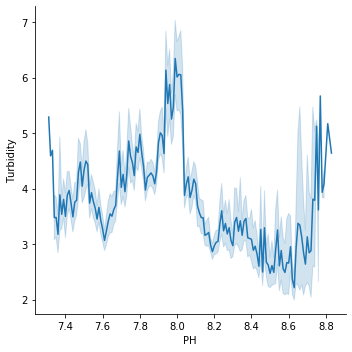

In [0]:

sns.relplot(x="PH", y="Turbidity", kind="line", data=mydata);

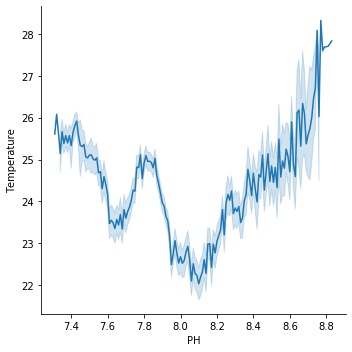

In [0]:
sns.relplot(x="PH", y="Temperature", kind="line", data=mydata);

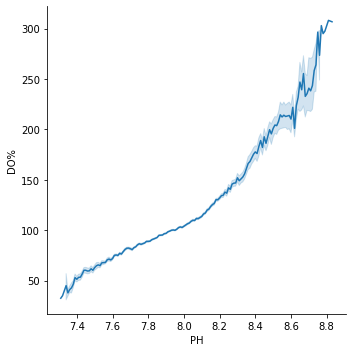

In [0]:
sns.relplot(x="PH", y="DO%", kind="line", data=mydata);

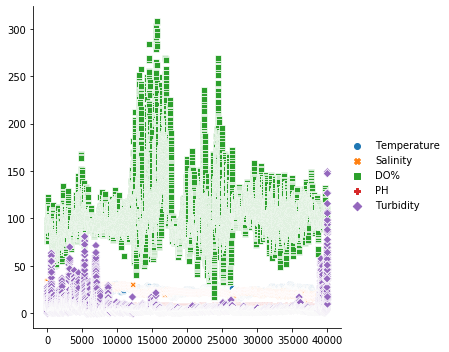

In [0]:
sns.relplot(data=mydata);

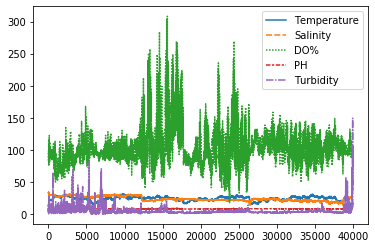

In [0]:
sns.lineplot(data=mydata);

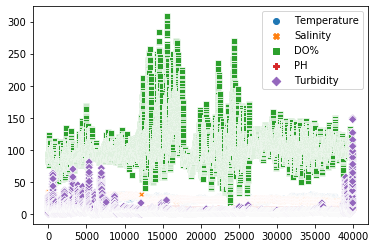

In [0]:
sns.scatterplot(data=mydata);

In [0]:
print(lm.intercept_)
print(lm.coef_)

In [0]:
df=pd.DataFrame(ph_pred,y_test)
print(df)

In [0]:
print(lm.predict([[26,33,208]]))

In [0]:
from sklearn.metrics import mean_squared_error,accuracy_score
mse=mean_squared_error(y_test,ph_pred)
#acc=accuracy_score(y_test,ph_pred)
print(mse)
#print(acc)

In [0]:
from sklearn.metrics import r2_score

print(r2_score(y_test,ph_pred))

In [0]:
fig,ax=plt.subplots()
ax.scatter(y_test,clf.predict(x_test))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

Predicting pH Only With Temperature Value


In [0]:
xx=mydata['Temperature']


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(xx,Y,test_size=0.3,random_state=5)

In [0]:
print(X_test.shape)
#X_train.reshape(1,-1)

In [0]:
lm.fit(mydata[['Temperature']],Y)

In [0]:
lm.predict([[35]])

Decision Tree Regression 

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=1)

In [0]:
dtr.fit(x_train,y_train)

In [0]:
pred=dtr.predict(x_test)


In [0]:
dd=pd.DataFrame(pred)
dd

In [0]:
from sklearn.metrics import r2_score

print(r2_score(y_test,dd))

In [0]:
y_test

Support Vector Machine Regression 

In [0]:
from sklearn import svm

svmmodel=svm.SVR()


In [0]:
svmmodel.fit(x_train,y_train)

In [0]:
svmpred=svmmodel.predict(x_test)

In [0]:
svmpred

In [0]:
#from sklearn.metrics import r2_score


print("Using Support Vector Regressor")
print("Mean Squared Error : %f"%(sklearn.metrics.mean_squared_error(y_test,svmpred)))
print("Mean Absolute Error : %f"%(sklearn.metrics.mean_absolute_error(y_test,svmpred)))
print("R2 Score : %f"%(sklearn.metrics.r2_score(y_test,svmpred)))

Gredient Boosting Regression 

In [0]:
from sklearn.utils import shuffle
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [0]:
clf = ensemble.GradientBoostingRegressor(**params)


In [0]:
clf.fit(x_train,y_train)


In [0]:
print("Accuracy : %f"%(r2_score(y_test,clf.predict(x_test))))
gbr=clf.predict(x_test)

In [0]:
mse = mean_squared_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, gbr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [0]:
data.columns